In [1]:
import pandas as pd

In [3]:
transaction = pd.read_csv('dataset/transactions_train.csv')

In [ ]:
transaction.t_dat = pd.to_datetime(transaction.t_dat) #, format='%y%m%d')

In [8]:
transaction.sort_values(['customer_id', 't_dat'], inplace=True)

In [9]:
transaction = transaction.reset_index(drop=True)

In [57]:
transaction.head(10)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-12-27,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,625548001,0.044051,1
1,2018-12-27,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,176209023,0.035576,1
2,2018-12-27,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,627759010,0.030492,1
3,2019-05-02,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,697138006,0.010153,2
4,2019-05-25,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601006,0.050831,2
5,2019-05-25,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601006,0.050831,2
6,2019-07-25,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,607642008,0.012695,1
7,2019-07-25,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,745232001,0.021169,1
8,2019-09-18,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,656719005,0.044051,2
9,2019-09-28,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,797065001,0.054220,2


In [117]:
frequency = transaction[['customer_id','t_dat']]

frequency.sort_values(['customer_id', 't_dat'], inplace=True)

frequency = frequency.drop_duplicates()

frequency = frequency.reset_index(drop=True)

frequency

/var/folders/60/gmbxqch57r53py2v67gwvz780000gn/T/ipykernel_18878/389124535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequency.sort_values(['customer_id', 't_dat'], inplace=True)


,customer_id,t_dat
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2018-12-27
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2019-05-02
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2019-05-25
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2019-07-25
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2019-09-18
...,...,...
9080174,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,2020-04-05
9080175,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,2020-04-09
9080176,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,2020-04-25
9080177,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,2020-06-22


In [106]:
# frequency = frequency.iloc[:100,:]

In [118]:
frequency.t_dat = pd.to_datetime(frequency.t_dat) #, format='%y%m%d')

In [108]:
# a = frequency['customer_id'][0]

# b = frequency['customer_id'][500]

In [109]:
# a_test = frequency[frequency['customer_id'] == a]
# b_test = frequency[frequency['customer_id'] == b]

# test_ = pd.concat([a_test,b_test])

# test_ = test_.reset_index(drop=True)

# test_

In [110]:
# type(test_['t_dat'][0])

In [111]:
# test_['t_dat'].diff()

In [112]:
# test_ = test_.reset_index(drop=True)
# test_ = test_.drop_duplicates()

In [119]:
import numpy as np

# test_['t_dat'] = test_.groupby('customer_id')['t_dat'].apply(lambda x: x.sort_values())
# test_['t_dat'] = test_.groupby('customer_id')['t_dat'].apply(lambda x: x.sort_values())
# frequency.sort_values(['customer_id', 't_dat'], inplace=True)

frequency['diff'] = frequency.groupby('customer_id')['t_dat'].diff() / np.timedelta64(1, 'D')


In [120]:
frequency['diff'] = frequency['diff'].fillna(0)

frequency.head(50)

,customer_id,t_dat,diff
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2018-12-27,0.0
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2019-05-02,126.0
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2019-05-25,23.0
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2019-07-25,61.0
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2019-09-18,55.0
5,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2019-09-28,10.0
6,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2019-11-22,55.0
7,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2019-11-28,6.0
8,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2020-03-21,114.0
9,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2020-09-05,168.0


In [153]:
frequency.to_csv('frequency.csv')

In [121]:
frequency = frequency[frequency['diff'] != 0]

frequency['diff'].mean()

48.25601478537291

In [126]:
a = frequency['diff']

a

1          126.0
2           23.0
3           61.0
4           55.0
5           10.0
           ...  
9080172     54.0
9080173      1.0
9080175      4.0
9080176     16.0
9080177     58.0
Name: diff, Length: 7717898, dtype: float64

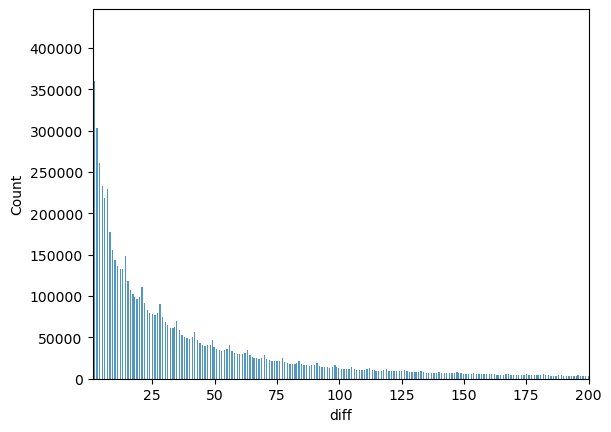

In [130]:
import seaborn as sns 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
sns.histplot(a, ax=ax)
ax.set_xlim(1,200)
plt.show()

In [155]:
transaction.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-12-27,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,625548001,0.044051,1
1,2018-12-27,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,176209023,0.035576,1
2,2018-12-27,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,627759010,0.030492,1
3,2019-05-02,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,697138006,0.010153,2
4,2019-05-25,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601006,0.050831,2


In [211]:
grow = transaction.groupby(['t_dat','sales_channel_id'])['price'].sum()

grow = pd.DataFrame(grow)

grow = grow.reset_index()

grow

,t_dat,sales_channel_id,price
0,2018-09-20,1,342.493254
1,2018-09-20,2,1072.852593
2,2018-09-21,1,382.669153
3,2018-09-21,2,1036.593153
4,2018-09-22,1,223.813085
...,...,...,...
1418,2020-09-20,2,919.970644
1419,2020-09-21,1,196.405525
1420,2020-09-21,2,943.192525
1421,2020-09-22,1,250.604559


In [212]:
grow_pivot = pd.pivot_table(data=grow, index='t_dat', values='price', columns='sales_channel_id')
grow_pivot = pd.DataFrame(grow_pivot)
# grow_pivot.columns = [f'{j}_{i}' for i,j in grow_pivot.columns]
grow_pivot

sales_channel_id,1,2
t_dat,,
2018-09-20,342.493254,1072.852593
2018-09-21,382.669153,1036.593153
2018-09-22,223.813085,306.624542
2018-09-23,197.185119,1396.597966
2018-09-24,238.804203,1168.805407
...,...,...
2020-09-18,361.705237,1002.152881
2020-09-19,423.714831,803.756475
2020-09-20,196.100424,919.970644


In [213]:
grow_pivot.shape


(734, 2)

In [214]:
c1_pct_val = grow_pivot.iloc[:,0].sum()/(grow_pivot.iloc[:,0].sum()+grow_pivot.iloc[:,1].sum())

c1_pct_val

0.2438069399984148

In [215]:
m = int(grow_pivot.shape[0]/2)
grow_c1_y1 = grow_pivot.iloc[:m,0].sum()
grow_c1_y2 = grow_pivot.iloc[m:,0].sum()
# grow_y2 = grow.iloc[m:,1].sum()
grow_c2_y1 = grow_pivot.iloc[:m,1].sum()
grow_c2_y2 = grow_pivot.iloc[m:,1].sum()

In [216]:
grow_c1_y1, grow_c1_y2, grow_c2_y1, grow_c2_y2

(119342.39637288112, 96340.43154237268, 343843.7114915248, 325119.4346440673)

In [217]:
1-grow_c1_y2/grow_c1_y1, 1-grow_c2_y2/grow_c2_y1

(0.19273925720947993, 0.05445577808078961)

In [218]:
grow_c1_y1/(grow_c1_y1+grow_c2_y1), grow_c1_y2/(grow_c1_y2+grow_c2_y2)

(0.25765538807527805, 0.22858743921243224)

<AxesSubplot:xlabel='t_dat', ylabel='price'>

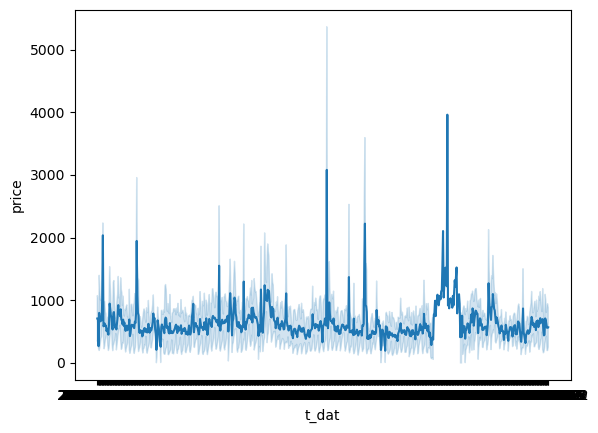

In [219]:
sns.lineplot(data=grow,x='t_dat',y='price')

# Grow Vol

In [220]:
grow_vol = transaction.groupby(['t_dat','sales_channel_id'])['price'].count()

grow_vol = pd.DataFrame(grow_vol)

grow_vol = grow_vol.reset_index()

grow_vol

,t_dat,sales_channel_id,price
0,2018-09-20,1,12656
1,2018-09-20,2,35743
2,2018-09-21,1,13848
3,2018-09-21,2,33695
4,2018-09-22,1,7735
...,...,...,...
1418,2020-09-20,2,24462
1419,2020-09-21,1,7424
1420,2020-09-21,2,24706
1421,2020-09-22,1,9458


In [221]:
grow_vol_pivot = pd.pivot_table(data=grow_vol, index='t_dat', values='price', columns='sales_channel_id')
grow_vol_pivot = pd.DataFrame(grow_vol_pivot)
# grow_pivot.columns = [f'{j}_{i}' for i,j in grow_pivot.columns]
grow_vol_pivot

sales_channel_id,1,2
t_dat,,
2018-09-20,12656.0,35743.0
2018-09-21,13848.0,33695.0
2018-09-22,7735.0,9900.0
2018-09-23,6853.0,45377.0
2018-09-24,8453.0,37531.0
...,...,...
2020-09-18,13532.0,25752.0
2020-09-19,15632.0,21164.0
2020-09-20,7027.0,24462.0


In [222]:
m = int(grow_vol_pivot.shape[0]/2)
grow_c1_y1 = grow_vol_pivot.iloc[:m,0].sum()
grow_c1_y2 = grow_vol_pivot.iloc[m:,0].sum()
# grow_y2 = grow.iloc[m:,1].sum()
grow_c2_y1 = grow_vol_pivot.iloc[:m,1].sum()
grow_c2_y2 = grow_vol_pivot.iloc[m:,1].sum()

In [223]:
1-grow_c1_y2/grow_c1_y1, 1-grow_c2_y2/grow_c2_y1

(0.19299300606627479, 0.07886570999655262)

In [224]:
c1_pct_vol = grow_vol_pivot.iloc[:,0].sum()/(grow_vol_pivot.iloc[:,0].sum()+grow_vol_pivot.iloc[:,1].sum())

c1_pct_vol

0.2959722569834132

In [225]:
grow_c1_y1/(grow_c1_y1+grow_c2_y1), grow_c1_y2/(grow_c1_y2+grow_c2_y2)

(0.30889120406199566, 0.281389100044581)